In [836]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [837]:
df = pd.read_csv(r"C:\Users\User\Downloads\IDS-SEM-PROJECT\data\car_price_prediction.csv")
#df1
df = df.copy()
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,4-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,4-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,4-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,4-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,4-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4,Manual,Rear,2-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4,Tiptronic,Front,4-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4,Automatic,Front,4-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4,Automatic,Front,4-May,Left wheel,Black,4


In [838]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()
df.dtypes

ID                   int64
Price                int64
Levy                object
Manufacturer        object
Model               object
Prod. year           int64
Category            object
Leather interior    object
Fuel type           object
Engine volume       object
Mileage             object
Cylinders            int64
Gear box type       object
Drive wheels        object
Doors               object
Wheel               object
Color               object
Airbags              int64
dtype: object

## Data Types Handling
As, some data types are mismatched, so we'll change them with appropriate ones.

In [839]:
df['Doors'].value_counts()

Doors
4-May    18332
2-Mar      777
>5         128
Name: count, dtype: int64

In [840]:
df['Doors'] = df['Doors'].astype(str).apply(lambda x: 4 if x=='4-May' else (2 if x=='2-Mar' else 6))
df['Doors']

0        4
1        4
2        4
3        4
4        4
        ..
19232    2
19233    4
19234    4
19235    4
19236    4
Name: Doors, Length: 19237, dtype: int64

In [841]:
df['ID'] = df['ID'].astype(str)
df['ID'] = df['ID'].astype(str)
df['Levy'] = df['Levy'].astype(str)
df['Levy'] = df['Levy'].str.replace('-','0')
df['Levy'] = df['Levy'].astype(np.int64)
df['Mileage'] = df['Mileage'].astype(str).str.replace('km','').astype(int)
df['Engine volume'] = df['Engine volume'].astype(str).str.replace('Turbo','').astype(float)
df['Leather interior'] = df['Leather interior'].astype(str).apply(lambda x: True if x=='Yes' else (False if x=='No' else None))
df['ID']

0        45654403
1        44731507
2        45774419
3        45769185
4        45809263
           ...   
19232    45798355
19233    45778856
19234    45804997
19235    45793526
19236    45813273
Name: ID, Length: 19237, dtype: object

## Fixing Column names 
We'll change every space in column name with underscore.

In [842]:
df.columns = df.columns.astype(str).str.replace(' ','_')
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod._year',
       'Category', 'Leather_interior', 'Fuel_type', 'Engine_volume', 'Mileage',
       'Cylinders', 'Gear_box_type', 'Drive_wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

## Missing Values Handling

In [843]:
#______Anlaysis of missing values
# here we'll generate a table/data frame for missing values comparison for every column in df
missing_value_df = pd.DataFrame({'Count': len(df),'Missing_valus':df.isnull().sum(),'Percent_missing_values':df.isnull().sum()/len(df)*100})
#missing_value_df
df['Price'].describe()

count      19237.00
mean       18555.93
std       190581.27
min            1.00
25%         5331.00
50%        13172.00
75%        22075.00
max     26307500.00
Name: Price, dtype: float64

## Duplicates Handling

In [844]:
df2=df[df.duplicated()]
df2['Price'].sort_values(ascending=False)
df=df.drop_duplicates()

## Outlier Detection

In [845]:
df['Price'].describe()

count      18924.00
mean       18587.44
std       192135.63
min            1.00
25%         5331.00
50%        13172.00
75%        22063.00
max     26307500.00
Name: Price, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x27cd3da91d0>,
 'caps': [<matplotlib.lines.Line2D at 0x27cd3da9450>,
 'boxes': [<matplotlib.lines.Line2D at 0x27cd3da9090>],
 'medians': [<matplotlib.lines.Line2D at 0x27cd3da96d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27cd3da9810>],
 'means': []}

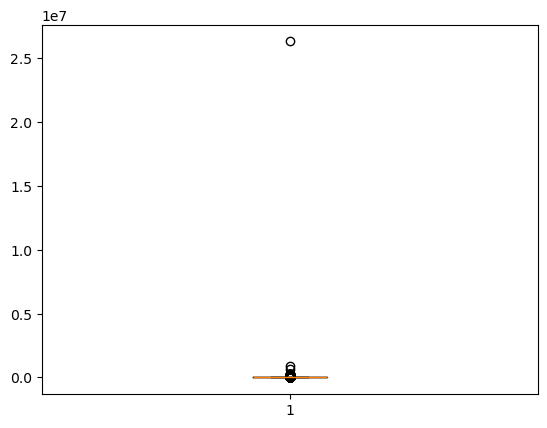

In [846]:
plt.boxplot(df['Price'])

We can see that one value is much greater, in millions possibly an error. Due to this, our data can be highly skewed and results will be not accurate. So, we'll make a rule to avoid this error. We'll replace all values greater than 97% quantile with the median.

count    18924.00
mean     17152.80
std      18238.68
min        627.00
25%       5331.00
50%      13172.00
75%      22063.00
max     308906.00
Name: Price, dtype: float64

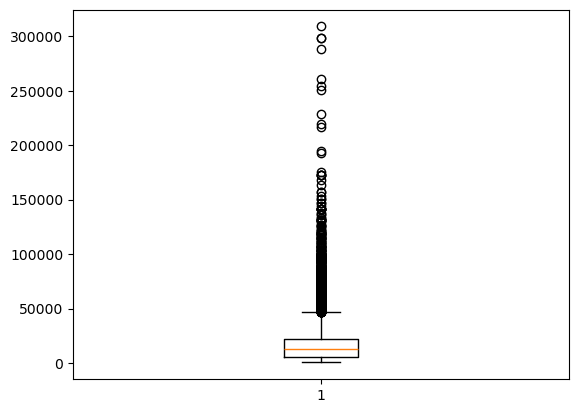

In [847]:
Q97 = df['Price'].quantile(0.9999)
price_med = df['Price'].median()
Q15 = df['Price'].quantile(0.10)
df.loc[:,'Price'] = np.where(df['Price']<Q15, Q15, df['Price']) 
df.loc[:,'Price'] = np.where(df['Price']>500000, price_med, df['Price']) 
plt.boxplot(df['Price'])
df['Price'].describe()

In [848]:
df['Levy'].describe()

count   18924.00
mean      632.89
std       568.27
min         0.00
25%         0.00
50%       642.00
75%       917.00
max     11714.00
Name: Levy, dtype: float64

In [849]:
df['Levy'].sort_values(ascending=False).head(50)
df['Levy'].quantile([0.10,0.25,0.90,0.95,0.97,0.98,0.99,0.999])

0.10      0.00
0.25      0.00
0.90   1273.00
0.95   1537.00
0.97   1750.00
0.98   1850.00
0.99   2225.00
1.00   4300.33
Name: Levy, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x27cd3a87b10>,
 'caps': [<matplotlib.lines.Line2D at 0x27cd3a87d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x27cd3a879d0>],
 'medians': [<matplotlib.lines.Line2D at 0x27cd3a3c050>],
 'fliers': [<matplotlib.lines.Line2D at 0x27cd3a3c190>],
 'means': []}

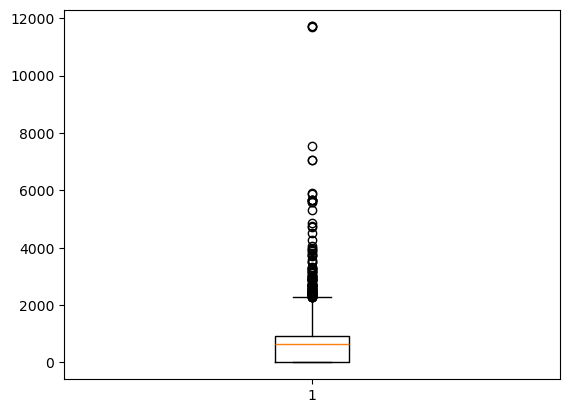

In [850]:
plt.boxplot(df['Levy'])

As, the maximum value in Levy column is much greater than 99.9% quantile. So, we can replace higher values with 75% quantile.
As, the minimum value is 0, which is relaistic. So, we'll not change it.

{'whiskers': [<matplotlib.lines.Line2D at 0x27cd3f2f4d0>,
 'caps': [<matplotlib.lines.Line2D at 0x27cd3f2f750>,
 'boxes': [<matplotlib.lines.Line2D at 0x27cd3f2f390>],
 'medians': [<matplotlib.lines.Line2D at 0x27cd3f2f9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27cd3f2fb10>],
 'means': []}

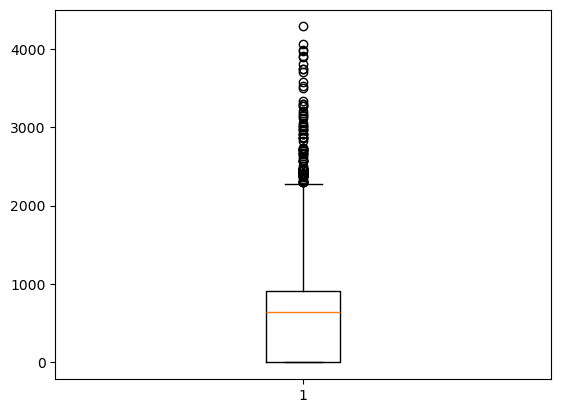

In [851]:
levy_Q99 = df['Levy'].quantile(0.999)
levy_Q75 = df['Levy'].quantile(0.75)
df.loc[:,'Levy'] = np.where(df['Levy']>levy_Q99, levy_Q75, df['Levy'])
plt.boxplot(df['Levy'])

In [852]:
df['Mileage'].describe()


count        18924.00
mean       1555372.72
std       48802205.32
min              0.00
25%          70195.75
50%         126400.00
75%         189119.75
max     2147483647.00
Name: Mileage, dtype: float64

In [853]:
#df['Levy'].sort_values(ascending=False).head(50)
df['Mileage'].quantile([0.10,0.25,0.90,0.95,0.97,0.98,0.99,0.999])

0.10      25000.00
0.25      70195.75
0.90     265587.40
0.95     320554.00
0.97     379260.16
0.98     430115.42
0.99     571115.00
1.00   62097759.17
Name: Mileage, dtype: float64

571115.0 126400.0


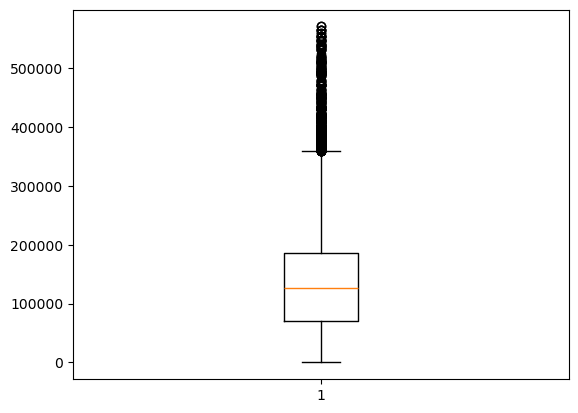

In [854]:
mileage_Q99 = df['Mileage'].quantile(0.99)
mileage_med = df['Mileage'].median()
df.loc[:,'Mileage'] = np.where(df['Mileage']>mileage_Q99, mileage_Q75, df['Mileage'])
plt.boxplot(df['Mileage'])
print(mileage_Q99,mileage_med)

In [855]:
df['Airbags'].describe()

count   18924.00
mean        6.57
std         4.32
min         0.00
25%         4.00
50%         6.00
75%        12.00
max        16.00
Name: Airbags, dtype: float64

In [856]:
df['Cylinders'].describe()

count   18924.00
mean        4.58
std         1.20
min         1.00
25%         4.00
50%         4.00
75%         4.00
max        16.00
Name: Cylinders, dtype: float64

In [857]:
df['Engine_volume'].sort_values(ascending=False).head(20)
print(df['Engine_volume'].quantile(0.999))

6.2


We can see that enginevolume's max value is far greater than 99.9%. So, we'll replace it with 95% quantile value.

6.2 4.0


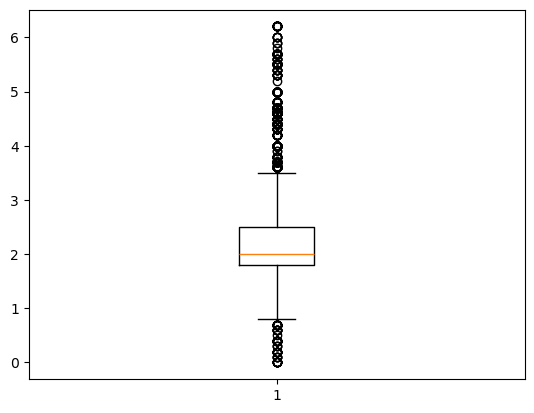

In [858]:
engine_Q99 = df['Engine_volume'].quantile(0.999)
engine_Q95 = df['Engine_volume'].quantile(0.95)
df.loc[:,'Engine_volume'] = np.where(df['Engine_volume']>engine_Q99, engine_Q95, df['Engine_volume'])
plt.boxplot(df['Engine_volume'])
print(engine_Q99,engine_Q95)

In [859]:
df.to_csv(r"C:\Users\User\Downloads\IDS-SEM-PROJECT\data\cleaned_data.csv",index=False)

In [860]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  object 
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  int64  
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod._year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather_interior  18924 non-null  bool   
 8   Fuel_type         18924 non-null  object 
 9   Engine_volume     18924 non-null  float64
 10  Mileage           18924 non-null  int64  
 11  Cylinders         18924 non-null  int64  
 12  Gear_box_type     18924 non-null  object 
 13  Drive_wheels      18924 non-null  object 
 14  Doors             18924 non-null  int64  
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object 
 17